# Logistic Regression

Logistic regression is a common tool for classification. We cannot use a normal linear regression model on binary groups. Rather than splitting the groups it would try to fit a line between them. We can however, use a logistic regression curve. 

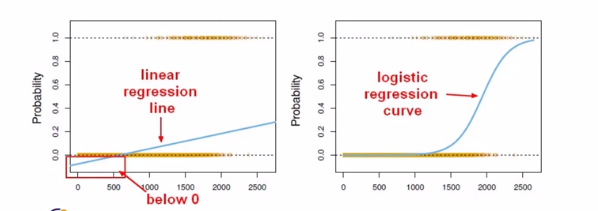

 This is the sigmoid function:
 $$ \phi(z) = \frac{1}{1 + e^{-z}}$$ 
 
The sigmoid function will always output a variable between 0 and 1. This allows us to set a threshold and output classes.  

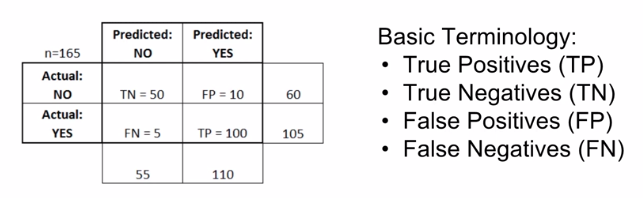

Here is a confusion matrix, a great way of visualizing our outcomes. False positives are called a type 1 error. False negatives are where we predicted they did not have the disease but they did have the disease- these are called a type 2 error. 

We can measure how often we are accurate with $\frac{(TN + TP)}{total} $ and our error rate, the misclassification rate with $\frac{(FN + FP)}{total} $

## Data Exploration

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

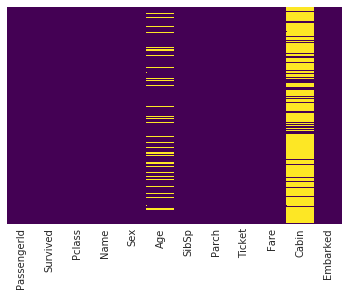

In [34]:
train = pd.read_csv('titanic_train.csv')
sns.heatmap(train.isnull(), yticklabels= False, cbar= False, cmap='viridis')

Looking at the graph above ticks that are yellow show that they returned true- and are null. And we can see that we are missing some age information and we are missing a lot of cabin information, and one row of embarked. Roughly 20% of that age information is missing which we can reasonably replace with some form of imputation. With the cabin data we are missing so much that there is not much we can do with it and we might drop it or transform it later. 

In [9]:
sns.set_style('whitegrid')

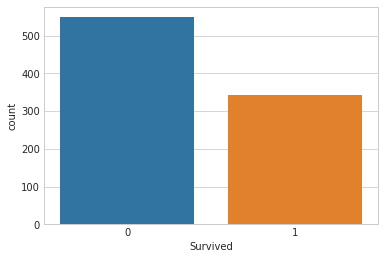

In [17]:
sns.countplot(x='Survived', data = train)

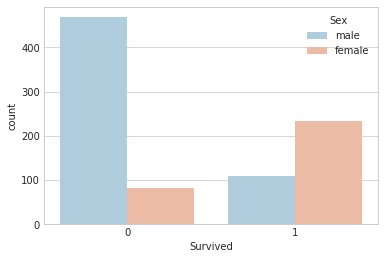

In [15]:
sns.countplot(x='Survived', hue='Sex', data = train, palette= 'RdBu_r')

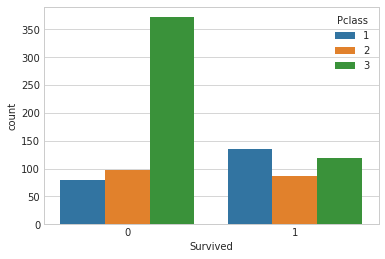

In [18]:
sns.countplot(x='Survived', hue='Pclass', data = train)

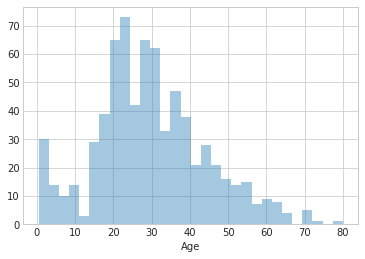

In [19]:
sns.distplot(train['Age'].dropna(), kde= False, bins = 30)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


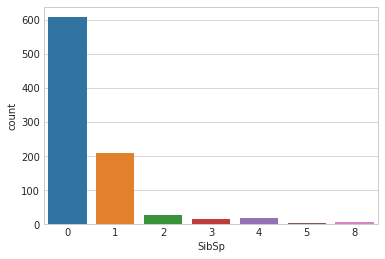

In [21]:
sns.countplot(x='SibSp', data = train)

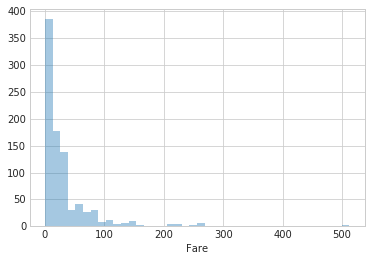

In [29]:
sns.distplot(train['Fare'], kde=False, bins=40)

In [30]:
import cufflinks as cf #cufflinks not installed
cf.go_offline()

train['Fare'].iplot(kind= 'hist', bins=30)

ImportError: No module named 'cufflinks'

## Data Imputation

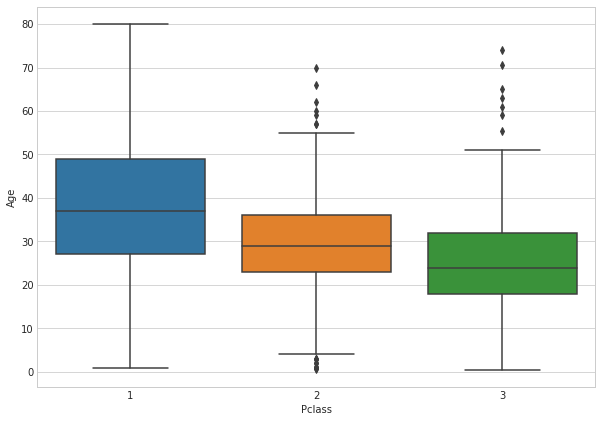

In [31]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data = train)

In [32]:
def impute_age(cols):
    Age= cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else: 
        return Age
    

In [36]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

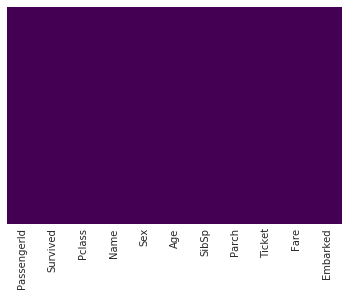

In [46]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Now that we have filled in the missing age values with imputation we are going the drop the entire cabin column because it is missing so many values and then we will drop the single row from embarked that is missing a value. We can run the heatmap aftwerward to see if there are any values still missing. 

In [43]:
train.drop('Cabin', axis=1, inplace= True)

ValueError: labels ['Cabin'] not contained in axis

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


We then have to apply one hot encoding to the sex category of the data. This is called a dummy variable, a format that indicates a 0 or 1 value that the algorithm can work with. We can see from the output that we end up with mulit-colinearity, where one predictor variable can be linearly predicted from the others with a substansital degree of accuracy. 

In [49]:
sex = pd.get_dummies(train['Sex'], drop_first= True)

In [50]:
embark= pd.get_dummies(train['Embarked'], drop_first=True)

In [56]:
train = pd.concat([train, sex, embark], axis=1)

In [52]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis= 1, inplace= True)

ValueError: labels ['Sex' 'Embarked' 'Name' 'Ticket'] not contained in axis

In [57]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [54]:
train.drop('PassengerId', axis = 1, inplace = True)

In [59]:
x = train.drop('Survived', axis = 1)
y = train['Survived']

In [60]:
from sklearn.cross_validation import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel= LogisticRegression()

In [64]:
logmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
predictions = logmodel.predict(x_test)

In [68]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[153  22]
 [ 35  85]]
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       175
          1       0.79      0.71      0.75       120

avg / total       0.81      0.81      0.80       295

